<a href="https://colab.research.google.com/github/jserrataylor/cursoAI/blob/main/Algoritmo_Aprendizaje_No_Supervisado_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**
Es un algoritmo de clustering basado en densidad. A diferencia de K-means o clustering jerárquico, no es necesario especificar el número de clusters de antemano, y es capaz de identificar clusters de formas arbitrarias, así como identificar puntos de ruido.

Para visualizar los resultados de DBSCAN, puedes usar un scatter plot (gráfico de dispersión). Sin embargo, si estás trabajando con datos de más de dos dimensiones, podrías considerar reducir la dimensionalidad con PCA (Principal Component Analysis) o t-SNE antes de graficar.

## Ejercicio # 1

[-1 -1 -1  0  0  0  0 -1  1  1 -1 -1 -1 -1  0  0  0  0  0  0  1  1  1 -1
 -1  0  0  0  0  0  0  0  1  1  1  1  1 -1  0  0  0  0  0  0  0  0  1  1
  1  1  1  1 -1 -1  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  0  0  0
  0  0  0  0  0  0  0  1  1  1  1  1  1 -1  0  0  0  0  0  0  0  0  0  0
  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  0
  0  0  0  0  0  0  0  0  0 -1  1  1  1  0  0  0  0  0  0  0  0  0  0  0
 -1  1  1  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0 -1 -1 -1  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0 -1  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0 -1 -1 -1
  0  0  0  0  0  0  0  0  0 -1  2 -1  0  0  0  0  0  2  2  2 -1 -1 -1  0
  0  0  0  0  0  0  2  2  2  2  2  2  2  0  0  0  0  0  0  2  2  2  2  2
  2  2  2  2 -1 -1 -1  0  2  2  2  2  2  2  2  2  2 -1 -1 -1 -1  2  2  2
  2  2  2  2  2 -1 -1 -1 -1 -1  2  2  2  2 -1 -1  2  2 -1]


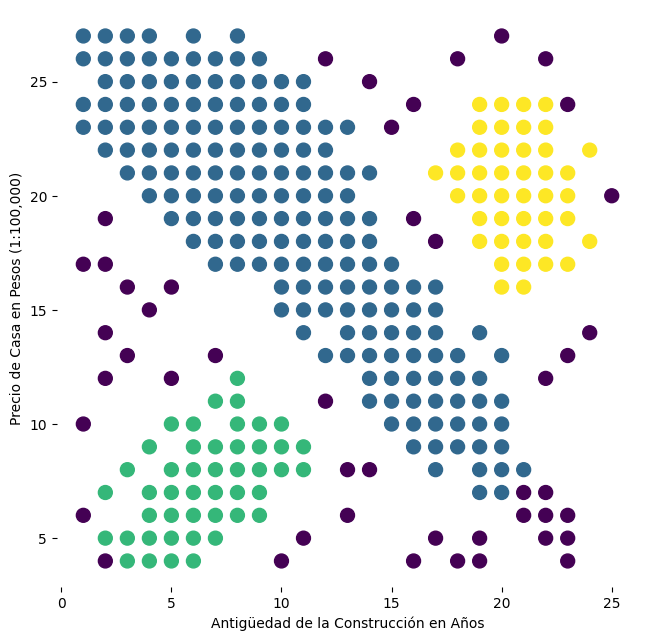

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Cargar datos
datos = np.loadtxt("https://raw.githubusercontent.com/CodigoMaquina/code/main/datos/casas.csv", delimiter=",")

# Identificar Clusters
clusters = DBSCAN(eps=2, min_samples=10).fit_predict(datos)
print(clusters)

# Gráfica de matplotlib para mostrar los Clusters
plt.figure(figsize=(7.5, 7.5))
plt.scatter(datos[:, 0], datos[:, 1], c=clusters, s=100)
plt.xlabel("Antigüedad de la Construcción en Años")
plt.ylabel("Precio de Casa en Pesos (1:100,000)")
plt.box(False)
plt.show()

## Ejercicio # 2

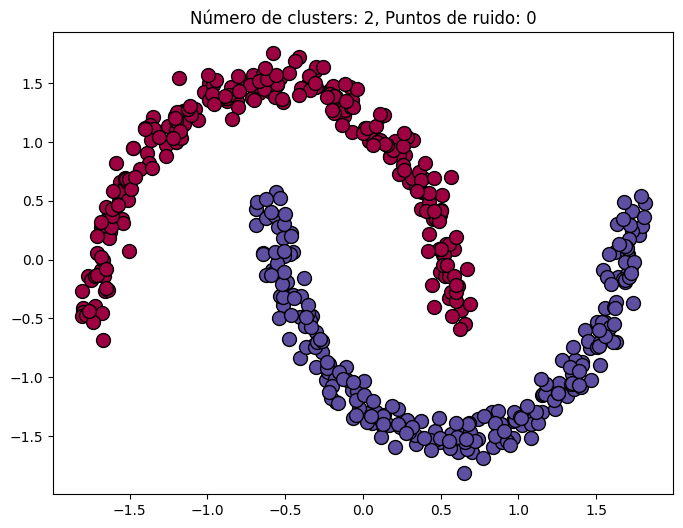

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

# Generar un conjunto de datos de ejemplo (dos lunas)
X, _ = make_moons(n_samples=500, noise=0.05, random_state=0)

# Escalar los datos
X_scaled = StandardScaler().fit_transform(X)

# Aplicar DBSCAN
db = DBSCAN(eps=0.3, min_samples=5)
labels = db.fit_predict(X_scaled)

# Identificar puntos centrales y puntos de ruido
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

# Graficar los resultados
plt.figure(figsize=(8, 6))

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Color negro para ruido

    class_member_mask = (labels == k)

    # Graficar los puntos centrales del cluster
    xy = X_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10)

    # Graficar los puntos de borde del cluster
    xy = X_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=5)

plt.title('Número de clusters: %d, Puntos de ruido: %d' % (n_clusters, n_noise))
plt.show()
